In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
data=pd.read_csv("C:/Users/SRISTI/Desktop/practice text doc/baseball_case.csv")
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Columns descriptions :
W : no of wins (target variable)
R : Runs
AB : At Bats
H : Hits
2B : Doubles
3B : Triples
HR : Homeruns
BB : Walks
SO : Strikeout
SB : Stolen bases
RA : Runs allowed
ER : Earned runs
ERA : Earned average runs
CG : Completed games
SHO : Shutouts
SV : Saves
E : Error

## EDA

In [3]:
data.shape

(30, 17)

dataset has 30 rows and 17 columns.

In [4]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All the columns are int type except ERA which is of float type.

In [5]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There is no null value in dataset.

In [6]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


There are vrey much difference in between mean and standard deviation, and some of columns have mean>median and some of have mean<median that means for sure there will be skewness present.

In [7]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [8]:
ds=data.copy()

### Univariate Analysis

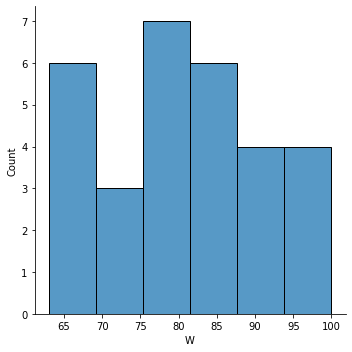

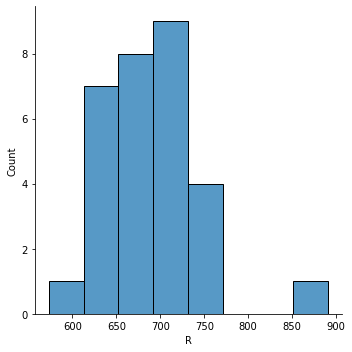

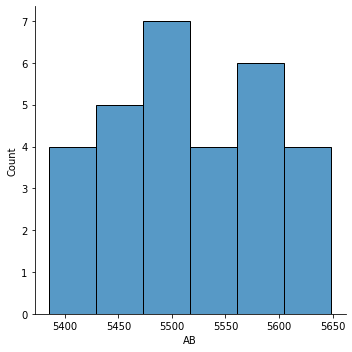

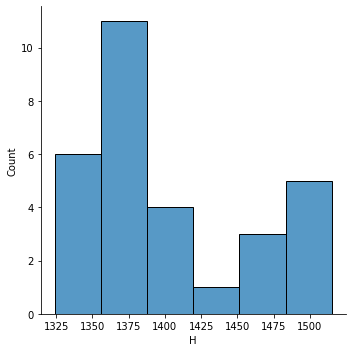

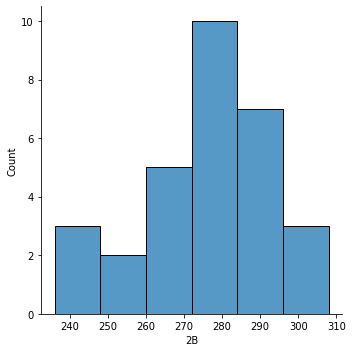

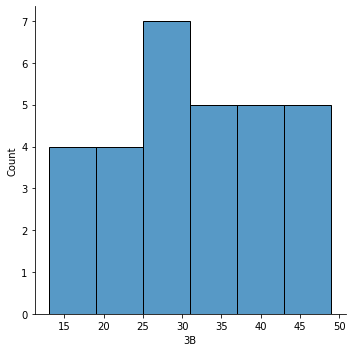

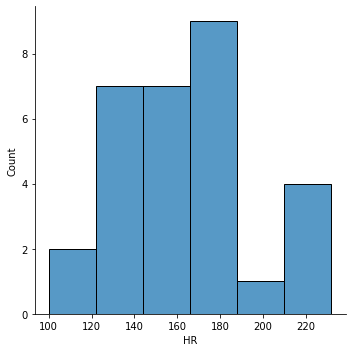

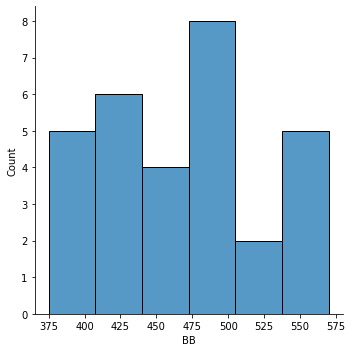

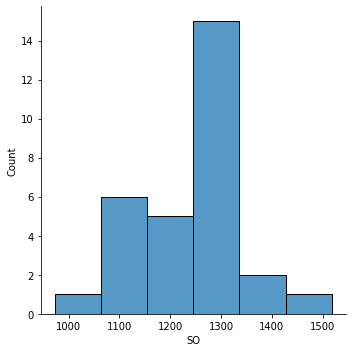

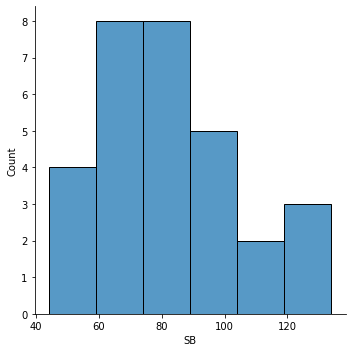

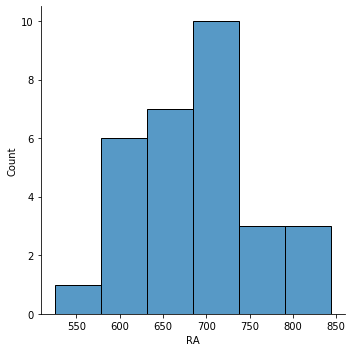

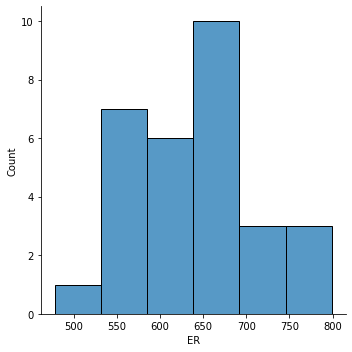

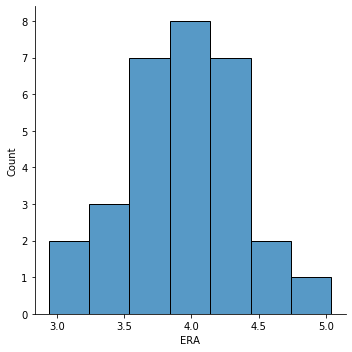

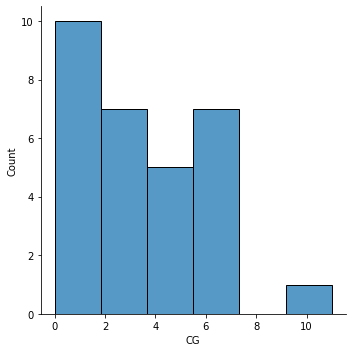

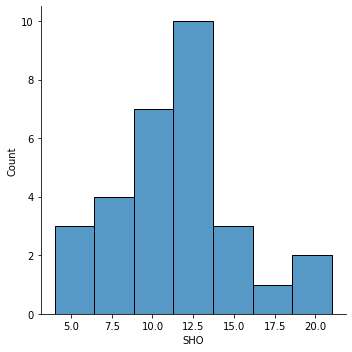

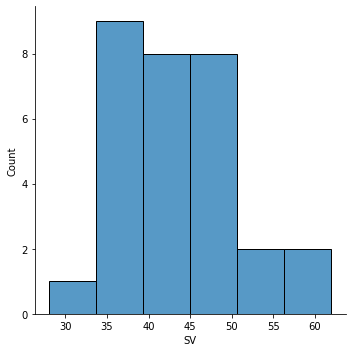

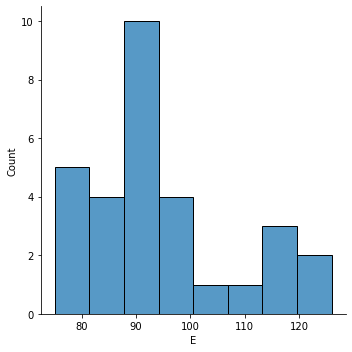

In [9]:
for i in ds.columns:
    sns.displot(ds[i])
    plt.show()  

Observation:
Most no of the win is about 80 to 85.
Runs between 650 to 700 heppen more than any other score.
Most frequent hits is at 1375.
Error 90 occur maximum times.
35 to 50 saves heppen more.
Avg. 12.5 shutouts occur maximum times.
Complete games have highest count at 0 to 2, means most of the games are not completed.

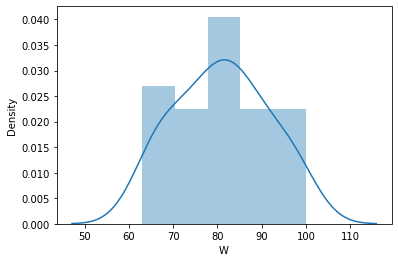

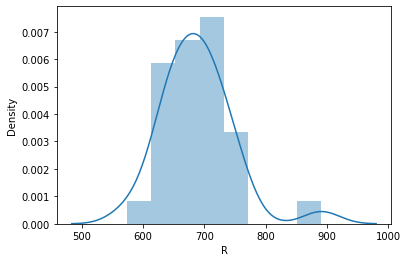

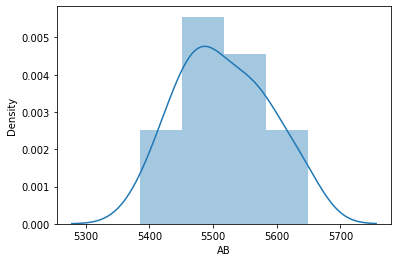

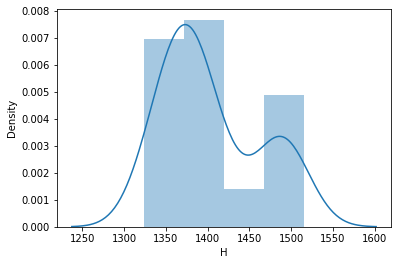

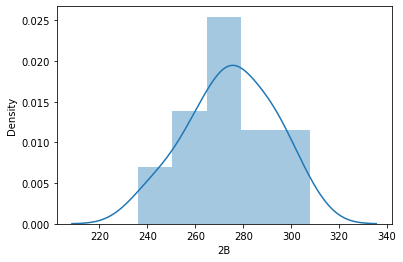

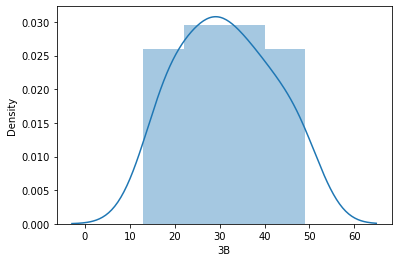

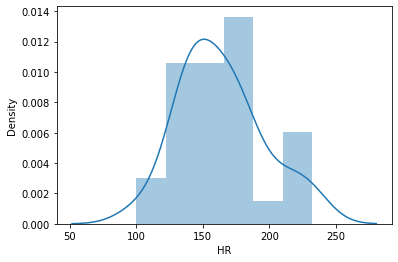

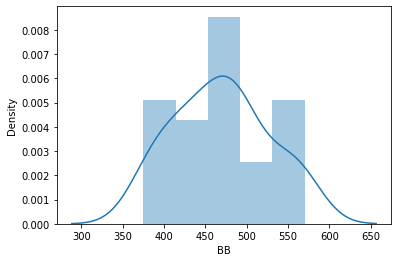

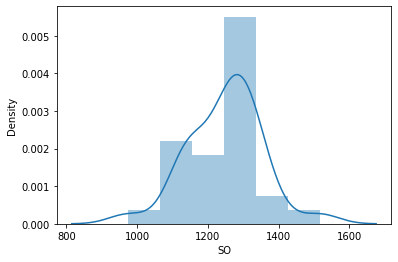

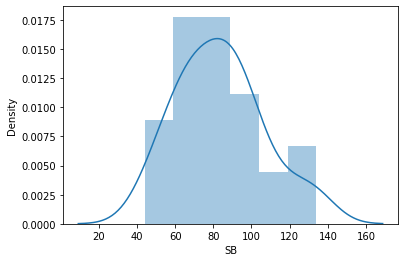

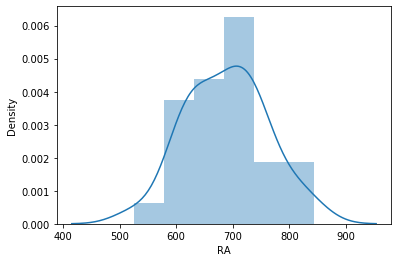

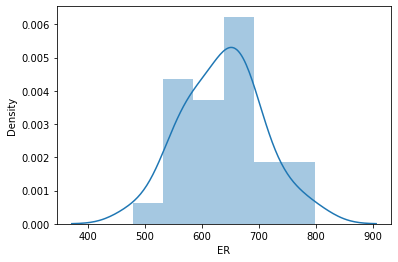

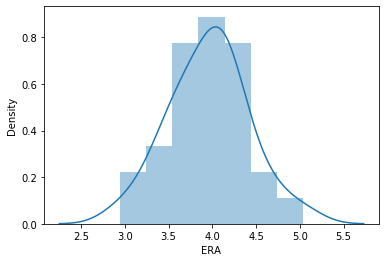

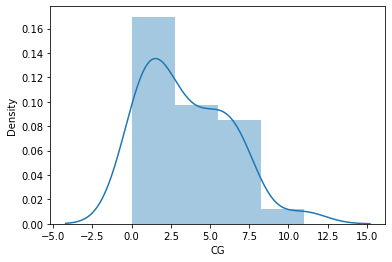

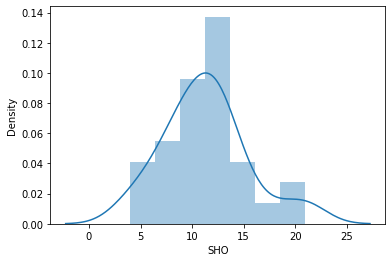

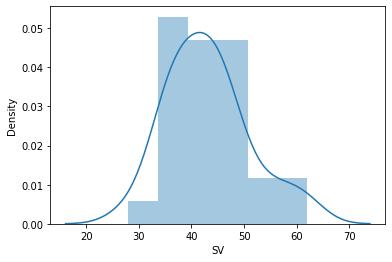

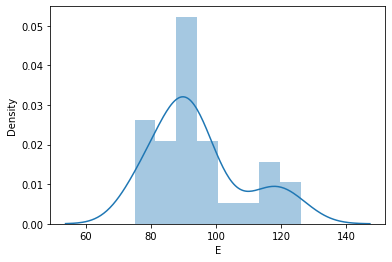

In [10]:
for i in ds.columns:
    sns.distplot(ds[i])
    plt.show()

Some of the columns are skewed while some are quite ok.
columns which are skewed we can process on further to reduce it.

### Bivariate Analysis

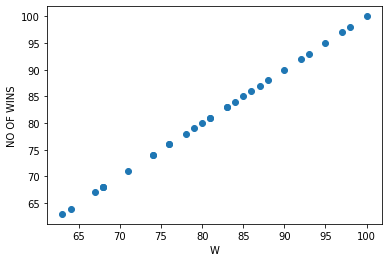

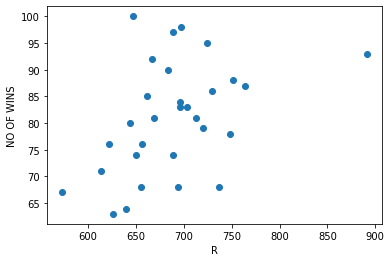

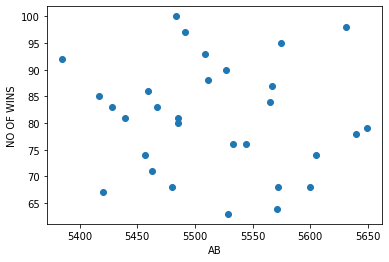

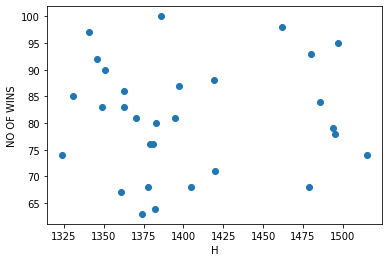

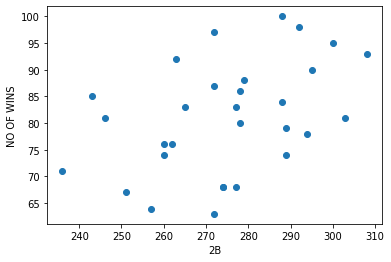

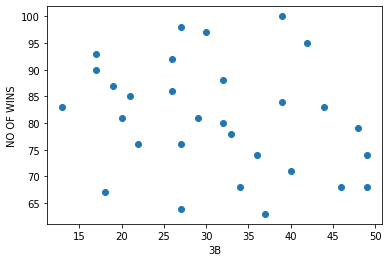

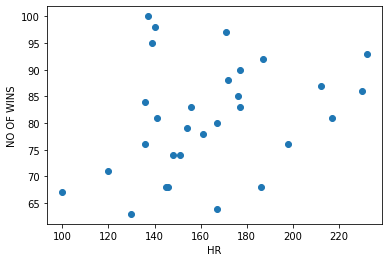

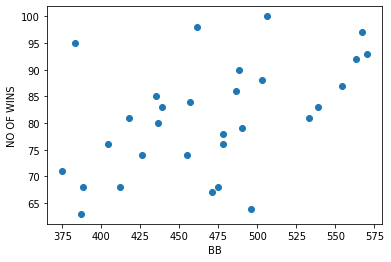

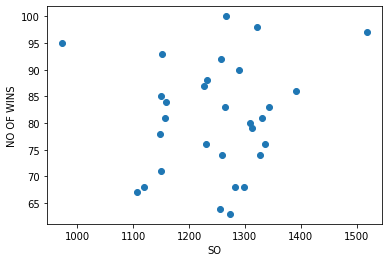

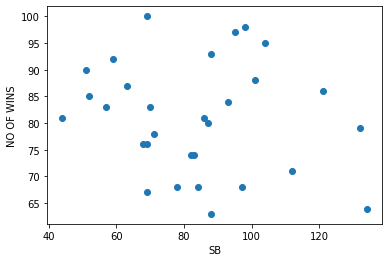

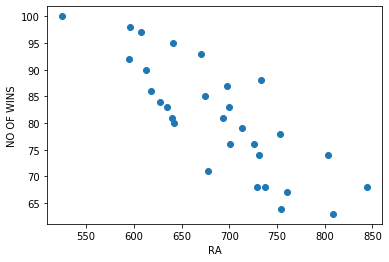

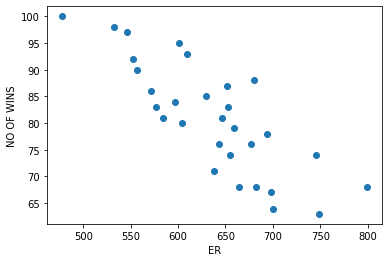

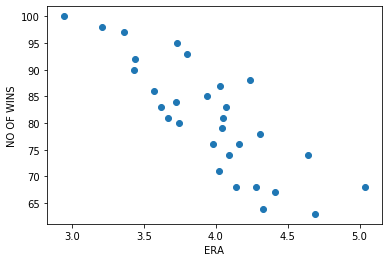

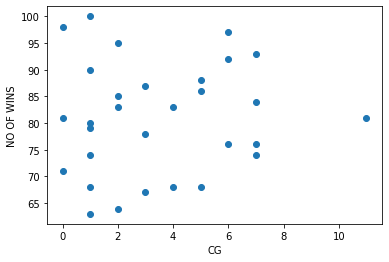

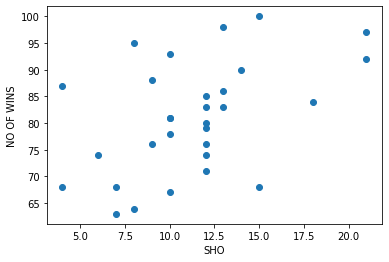

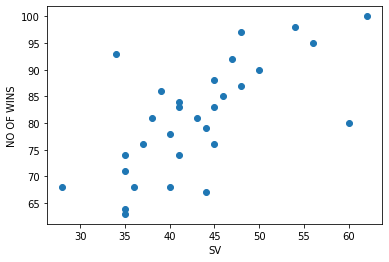

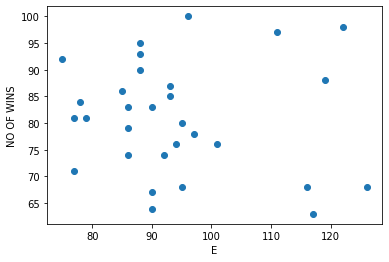

In [11]:
for i in ds.columns:
    plt.scatter(ds[i],ds['W'])
    plt.xlabel(i)
    plt.ylabel('NO OF WINS')
    plt.show()

Observation:
No. of wins maximun at 650 to 750 runs, but at highest run 900 no of wins is less.
No. of wins initially decreses with increse in AB, but from 5550 it again increases.
No. of wins fluctuated in decreasing and then increasing manner with increase in H.
No. of wins look like in zig-zag manner with 2B and 3B.
No. of wins increses with increase in HR,BB and SV.
No. of wins decreases with increase in RA,ER and ERA.
Maximun No. of wins occure when game is likely to incomplete.
Maximun No. of wins occure at high E.

### Mutlivariate Analysis

In [12]:
ds.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


We can observe correlation better on heatmap, lets do that.

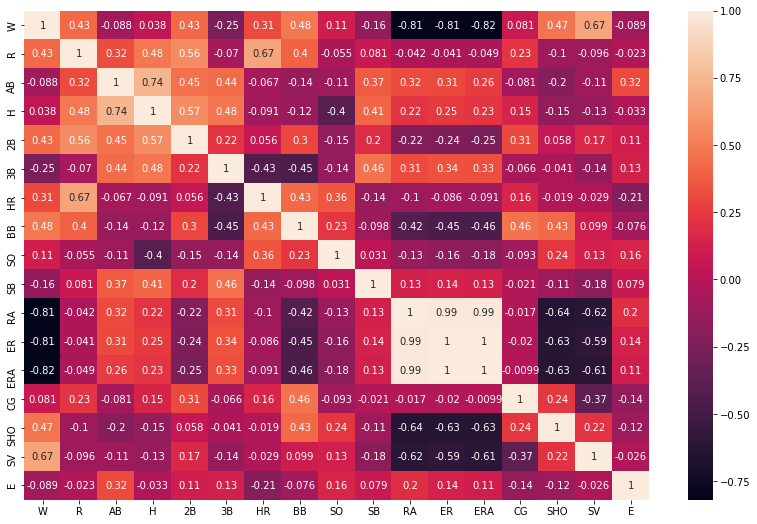

In [13]:
plt.figure(figsize=(14,9))
sns.heatmap(ds.corr(),annot=True)

There are many columns which are highly correlted to label(W) such as R,2B,BB,RA,ERA,ER,SHO,SV.
RA,ER and ERA are highly correlated to each other, we can drop anytwo of them.
RA,ER and ERA are also highly correlated to SHO and SV.
RA,ER and ERA are also quite good correlated with BB.
AB and H are very good correlated to each other.
AB,H are also correlated to 2B and 3B each.

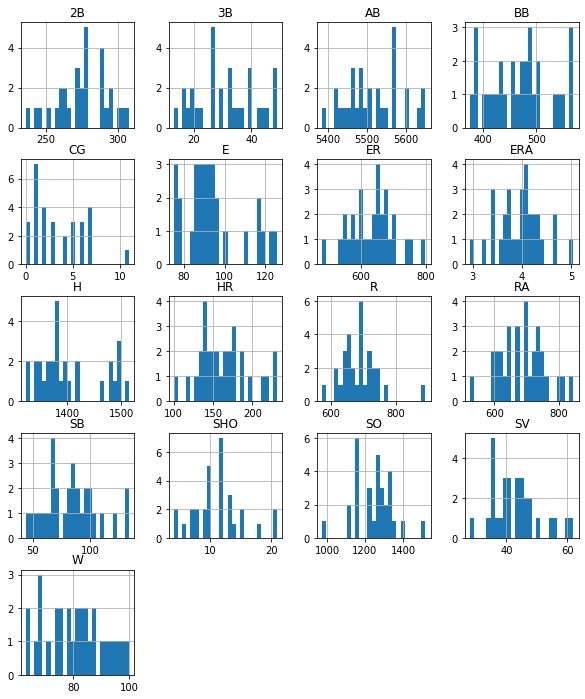

In [14]:
ds.hist(bins=25,figsize=(10,12))
plt.show()

Above visualization shows the feature distribution in term of frequency.

### Checking for outliers

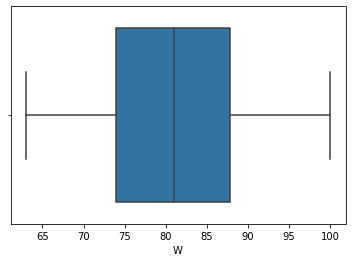

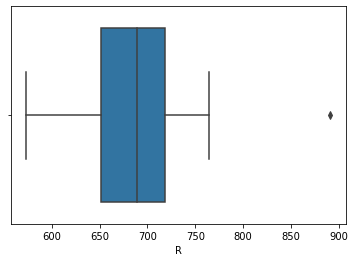

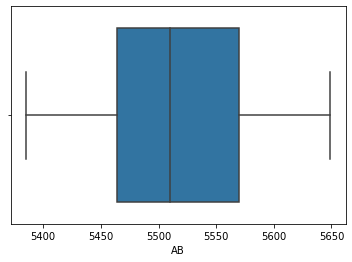

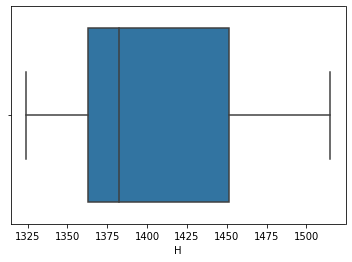

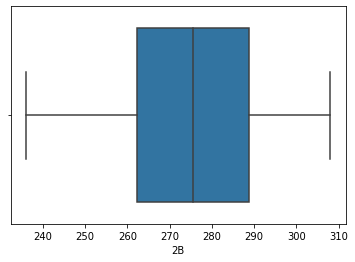

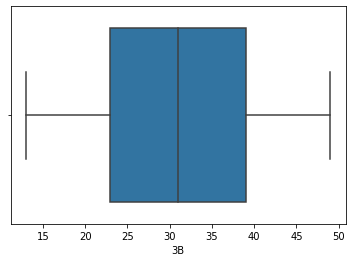

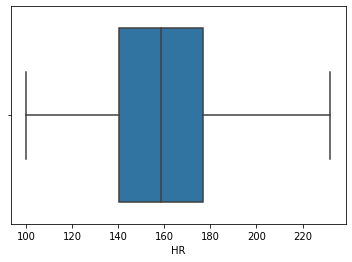

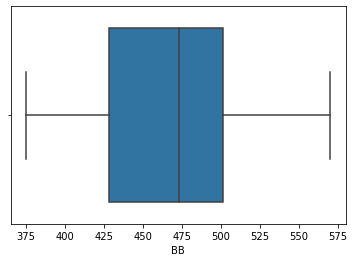

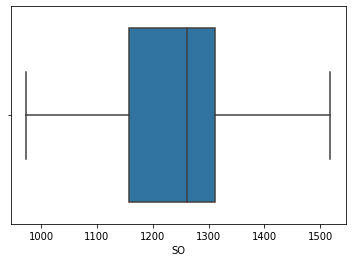

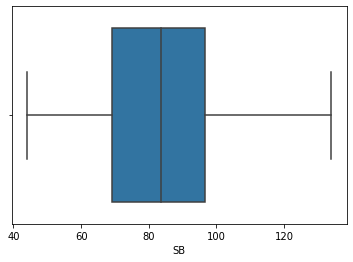

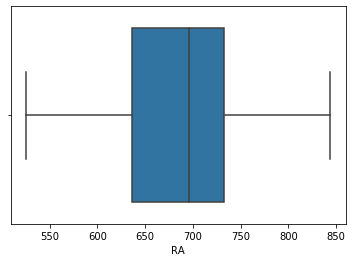

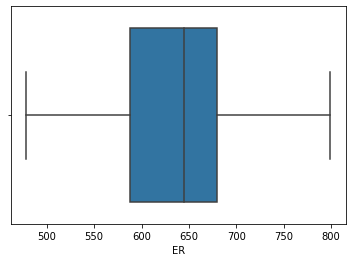

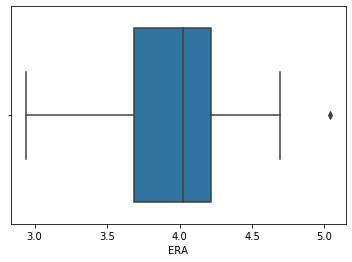

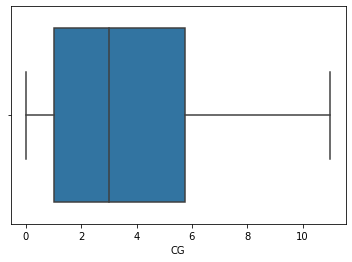

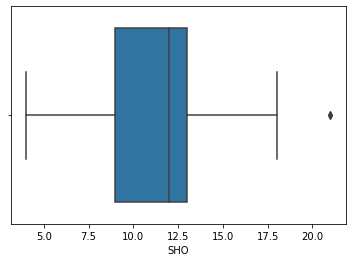

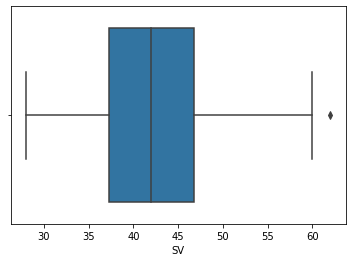

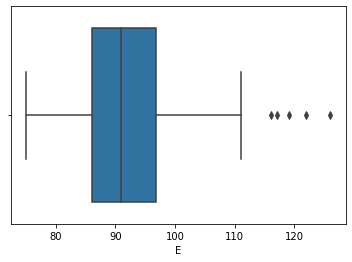

In [15]:
for i in ds.columns:
    sns.boxplot(ds[i])
    plt.show()

Maximun columns are free from outliers. R,ERA,SHO and SV these columns has very less outliers,E column has some more outlier, we can remove or leave it also. but we are going to use capping.

In [16]:
ds1=ds.copy()

In [17]:
def iqr_cap(df,cols,factor):
    for col in cols:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        up_wsk=q3+(factor*iqr)
        lw_wsk=q1-(factor*iqr)
        df[col]=np.where(df[col]>up_wsk, up_wsk, np.where(df[col]<lw_wsk, lw_wsk, df[col]))

In [18]:
ls=['R','ERA','SHO','SV','E']
iqr_cap(ds1,ls,1.5)

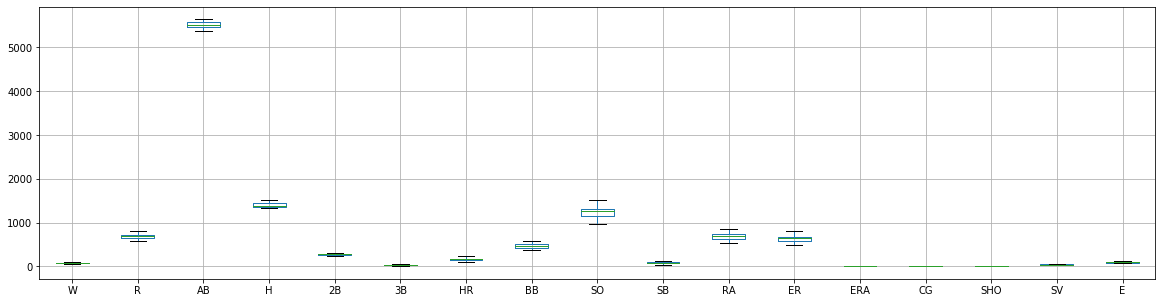

In [19]:
ds1.boxplot(figsize=[20,6])
plt.subplots_adjust(bottom=.25)
plt.show()

### Checking for skewness

In [20]:
ds1.skew()

W      0.047089
R      0.284282
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.037969
CG     0.736845
SHO    0.218030
SV     0.612333
E      0.504019
dtype: float64

Skewed columns are H,HR,CG,SV and E.

after removing the skewness all the rows of H becomes zero and removing the skewness from HR accuracy becomes very less so we only remove skewness from CG,SV AND E.

In [21]:
from sklearn.preprocessing import PowerTransformer

In [22]:
list1=['CG','SV','E']

pt=PowerTransformer(method='yeo-johnson',standardize=True)
for i in list1:
    ds1[i]=pt.fit_transform(ds1[i].values.reshape(-1,1))

In [23]:
ds1.skew()

W      0.047089
R      0.284282
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.037969
CG    -0.059785
SHO    0.218030
SV     0.001270
E      0.032939
dtype: float64

### Spliting the data into test and train

In [24]:
x=ds1.drop(columns=['W','ER'],axis=1)  # since ER and ERA contribute same information so we can drop one of them.
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,724.00,5575,1497,300,42,139,383,973,104,641,3.73000,-0.359844,8.0,1.564693,-0.357505
1,696.00,5467,1349,277,44,156,439,1264,70,700,4.07000,-0.359844,12.0,0.361185,-0.560947
2,669.00,5439,1395,303,29,141,533,1157,86,640,3.67000,1.993513,10.0,-0.611107,-1.355876
3,622.00,5533,1381,260,27,136,404,1231,68,701,3.98000,1.220103,9.0,-0.767843,0.764697
4,689.00,5605,1515,289,49,151,455,1259,83,803,4.64000,1.220103,12.0,-1.097417,-0.560947
5,818.75,5509,1480,308,17,232,570,1151,88,670,3.80000,1.220103,10.0,-1.270937,-0.357505
6,764.00,5567,1397,272,19,212,554,1227,63,698,4.03000,0.064630,4.0,0.722648,0.112048
7,713.00,5485,1370,246,20,217,418,1331,44,693,4.05000,-1.729889,10.0,0.103367,-1.610097
8,644.00,5485,1383,278,32,167,436,1310,87,642,3.74000,-0.909181,12.0,1.931952,0.285744
9,748.00,5640,1495,294,33,161,478,1148,71,753,4.31000,0.064630,10.0,-0.312240,0.452124


In [25]:
y=ds1['W']
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

### Scaling the features

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
ss=StandardScaler()

In [28]:
x_new=ss.fit_transform(x)
x_new=pd.DataFrame(x_new,columns=x.columns)
x_new

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.759052,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.507186,-0.359844,-0.844153,1.564693,-0.357505
1,0.202314,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.256260,-0.359844,0.222145,0.361185,-0.560947
2,-0.334539,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.641912,1.993513,-0.311004,-0.611107,-1.355876
3,-1.269063,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.054171,1.220103,-0.577578,-0.767843,0.764697
4,0.063130,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.536154,1.220103,0.222145,-1.097417,-0.560947
5,2.643011,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.350006,1.220103,-0.311004,-1.270937,-0.357505
6,1.554391,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.166442,0.064630,-1.910451,0.722648,0.112048
7,0.540333,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.211351,-1.729889,-0.311004,0.103367,-1.610097
8,-0.831626,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.484732,-0.909181,0.222145,1.931952,0.285744
9,1.236255,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.795162,0.064630,-0.311004,-0.312240,0.452124


We are scaling the feature data so that all the features have same type of scale, so that model could not bias with higher values.

In [29]:
x=x_new.copy()

### Finding the best random State

In [30]:
maxacc=0
maxrs=0

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_sc=r2_score(y_test,pred)
    if r2_sc>maxacc:
        maxacc=r2_sc
        maxrs=i
print('best r2_sc is:',maxacc,' at random state', maxrs)

best r2_sc is: 0.8412666689196607  at random state 181


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5,random_state=181)

In [32]:
x_train.shape

(15, 15)

In [33]:
x_test.shape

(15, 15)

In [34]:
y_train.shape

(15,)

In [35]:
y_test.shape

(15,)

### Model Training

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
lr=LinearRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(r2_score(y_test,predlr))
print(mean_squared_error(y_test,predlr))
crs=cross_val_score(lr,x,y,cv=4)
print(crs.mean())

0.8412666689196607
19.743604460508333
0.4636583484961132


### Regularization

In [38]:
# lasso

ls=Lasso()
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print(r2_score(y_test,predls))
print(mean_squared_error(y_test,predls))
crs=cross_val_score(ls,x,y,cv=3)
print(crs.mean())

0.7418583054303127
32.10823761878786
0.7094231237844756


In [39]:
# Ridge

rg=Ridge()
rg.fit(x_train,y_train)
predrg=rg.predict(x_test)
print(r2_score(y_test,predrg))
print(mean_squared_error(y_test,predrg))
crs=cross_val_score(rg,x,y,cv=3)
print(crs.mean())

0.769258107020577
28.700189408542812
0.5121484600736458


In [40]:
# ElasticNet

el=ElasticNet()
el.fit(x_train,y_train)
predel=el.predict(x_test)
print(r2_score(y_test,predel))
print(mean_squared_error(y_test,predel))
crs=cross_val_score(el,x,y,cv=3)
print(crs.mean())

0.6886706486751166
38.72383656079193
0.632926672640869


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [42]:
rfr=RandomForestRegressor()
ad=AdaBoostRegressor()
etr=ExtraTreesRegressor()
gbr=GradientBoostingRegressor()
knr=KNeighborsRegressor()
xgr=XGBRegressor()

In [43]:
model=[rfr,ad,etr,gbr,knr,xgr]

for i in model:
    print('model:',i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(r2_score(y_test,pred))
    print(mean_squared_error(y_test,pred))
    crs=cross_val_score(i,x,y,cv=4)
    print(crs.mean())
    print('\n')

model: RandomForestRegressor()
0.49869368612877873
62.35359333333333
0.3813984193911149


model: AdaBoostRegressor()
0.4871801911645811
63.78566742252458
0.47319162536215686


model: ExtraTreesRegressor()
0.5626676195240476
54.39637333333334
0.3547621425175853


model: GradientBoostingRegressor()
0.6017150506361212
49.53956707954449
0.25671876980690583


model: KNeighborsRegressor()
0.40977631672979375
73.41333333333328
0.3942485822569657


model: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None

after training different-2 model, we ensure the least difference between r2_score and cross validation score and choose them for hyperparameter tunning.
therefore we choose Lasso, ElasticNet,AdaBoost and KNeighbors.

### Hyperparameter tunning

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
# lasso 
par={'alpha':(0.1,0.01,0.2,0.002,1.0),'normalize':['True'],'max_iter':(1000,1500,2000),'selection':['cyclic','random']}
gcv=GridSearchCV(ls,par,cv=4)
gcv.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': (0.1, 0.01, 0.2, 0.002, 1.0),
                         'max_iter': (1000, 1500, 2000), 'normalize': ['True'],
                         'selection': ['cyclic', 'random']})

In [46]:
gcv.best_params_

{'alpha': 0.01, 'max_iter': 1000, 'normalize': 'True', 'selection': 'cyclic'}

In [49]:
lsr=Lasso(alpha=0.01,max_iter=1000,normalize=True,selection='cyclic')
lsr.fit(x_train,y_train)
predlsr=lsr.predict(x_test)
print(r2_score(y_test,predlsr))
print(mean_squared_error(y_test,predlsr))

0.80213737251929
24.61059330077845


In [50]:
# ElasticNet

par={'alpha':(0.1,0.01,0.2,1.0),'normalize':['True'],'max_iter':(1000,1500,2000),'selection':['cyclic','random'],
    'l1_ratio':(0.0,0.5,1.0)}
gcv=GridSearchCV(el,par,cv=4)
gcv.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=ElasticNet(),
             param_grid={'alpha': (0.1, 0.01, 0.2, 1.0),
                         'l1_ratio': (0.0, 0.5, 1.0),
                         'max_iter': (1000, 1500, 2000), 'normalize': ['True'],
                         'selection': ['cyclic', 'random']})

In [51]:
gcv.best_params_

{'alpha': 0.01,
 'l1_ratio': 1.0,
 'max_iter': 2000,
 'normalize': 'True',
 'selection': 'random'}

In [52]:
eln=ElasticNet(alpha=0.01,l1_ratio=1.0,max_iter=2000,normalize=True,selection='random')
eln.fit(x_train,y_train)
predeln=eln.predict(x_test)
print(r2_score(y_test,predeln))
print(mean_squared_error(y_test,predeln))

0.80214255415476
24.60994879744395


In [53]:
# adaboost regressor

par={'n_estimators':(10,20,30,40,50,60),'learning_rate':[0.001,0.002,0.01,0.1],'loss':['linear','square','exponential']}

gcv=GridSearchCV(ad,par,cv=4)
gcv.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.002, 0.01, 0.1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': (10, 20, 30, 40, 50, 60)})

In [54]:
gcv.best_params_

{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 30}

In [55]:
ada=AdaBoostRegressor(learning_rate=0.01,n_estimators=30,loss='linear')
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print(r2_score(y_test,predada))
print(mean_squared_error(y_test,predada))

0.5017531086972057
61.973055555555554


In [59]:
# kneighbors regressor

par={'n_neighbors':[3,5,7],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],
    'n_jobs':[-1],'leaf_size':[8,10,12,14,16]}
gcv=GridSearchCV(knr,par,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [8, 10, 12, 14, 16], 'n_jobs': [-1],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [60]:
gcv.best_params_

{'algorithm': 'auto',
 'leaf_size': 8,
 'n_jobs': -1,
 'n_neighbors': 5,
 'weights': 'uniform'}

In [61]:
kn=KNeighborsRegressor(n_neighbors=5,algorithm='auto',leaf_size=8,weights='uniform',n_jobs=-1)
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print(r2_score(y_test,predkn))
print(mean_squared_error(y_test,predkn))

0.40977631672979375
73.41333333333328


from above model we can choose having best accuracy between lasso and elasticnet, as their accuracy is same then having less MSE that is ElasticNet. hence our final model is using ElasticNet.

### Saving the model

In [62]:
import joblib

In [63]:
joblib.dump(eln,'baseball_elnet.obj')

['baseball_elnet.obj']